Exploratory data analysis

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

QQQ

In [14]:
df_qqq = pd.read_csv('QQQ_full_dataset.csv')
df_qqq = df_qqq.set_index('rec_date')

In [15]:
df_qqq.head()

,open,high,low,close,volume,weekday,month,holiday,close_change,volume_change,...,dj_abstract_neg,dj_abstract_pos,nytimes_abstract_neu,nytimes_abstract_compound,nytimes_abstract_neg,nytimes_abstract_pos,wsj_abstract_neu,wsj_abstract_compound,wsj_abstract_neg,wsj_abstract_pos
rec_date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,46.259998,46.279999,45.75,45.750000,50079200.0,5,1,1,0.000000,0.0,...,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-02,46.259998,46.279999,45.75,45.750000,50079200.0,6,1,0,0.000000,0.0,...,0.0,0.0,13.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
2010-01-03,46.259998,46.279999,45.75,45.750000,50079200.0,7,1,0,0.000000,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-04,46.330002,46.490002,46.27,46.419998,62822800.0,1,1,0,0.669998,12743600.0,...,0.0,0.0,31.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
2010-01-05,46.389999,46.500000,46.16,46.419998,62935600.0,2,1,0,0.000000,112800.0,...,0.0,0.0,36.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0


In [25]:
df_qqq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3651 entries, 2010-01-01 to 2019-12-30
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   open                       3651 non-null   float64
 1   high                       3651 non-null   float64
 2   low                        3651 non-null   float64
 3   close                      3651 non-null   float64
 4   volume                     3651 non-null   float64
 5   weekday                    3651 non-null   int64  
 6   month                      3651 non-null   int64  
 7   holiday                    3651 non-null   int64  
 8   close_change               3651 non-null   float64
 9   volume_change              3651 non-null   float64
 10  price_gap                  3651 non-null   float64
 11  is_closed_by_high          3651 non-null   int64  
 12  is_closed_by_low           3651 non-null   int64  
 13  up_down                    3651 non-nu

As observed, there are no missing values for all variables.

In [74]:
# Divide data into price data and news data
price_qqq = df_qqq.iloc[:,:11].drop(columns = ['weekday','month','holiday'])
news_qqq = df_qqq.iloc[:,14:]

EDA for price data

In [83]:
price_var = price_qqq.columns
price_var

Index(['open', 'high', 'low', 'close', 'volume', 'close_change',
       'volume_change', 'price_gap'],
      dtype='object')

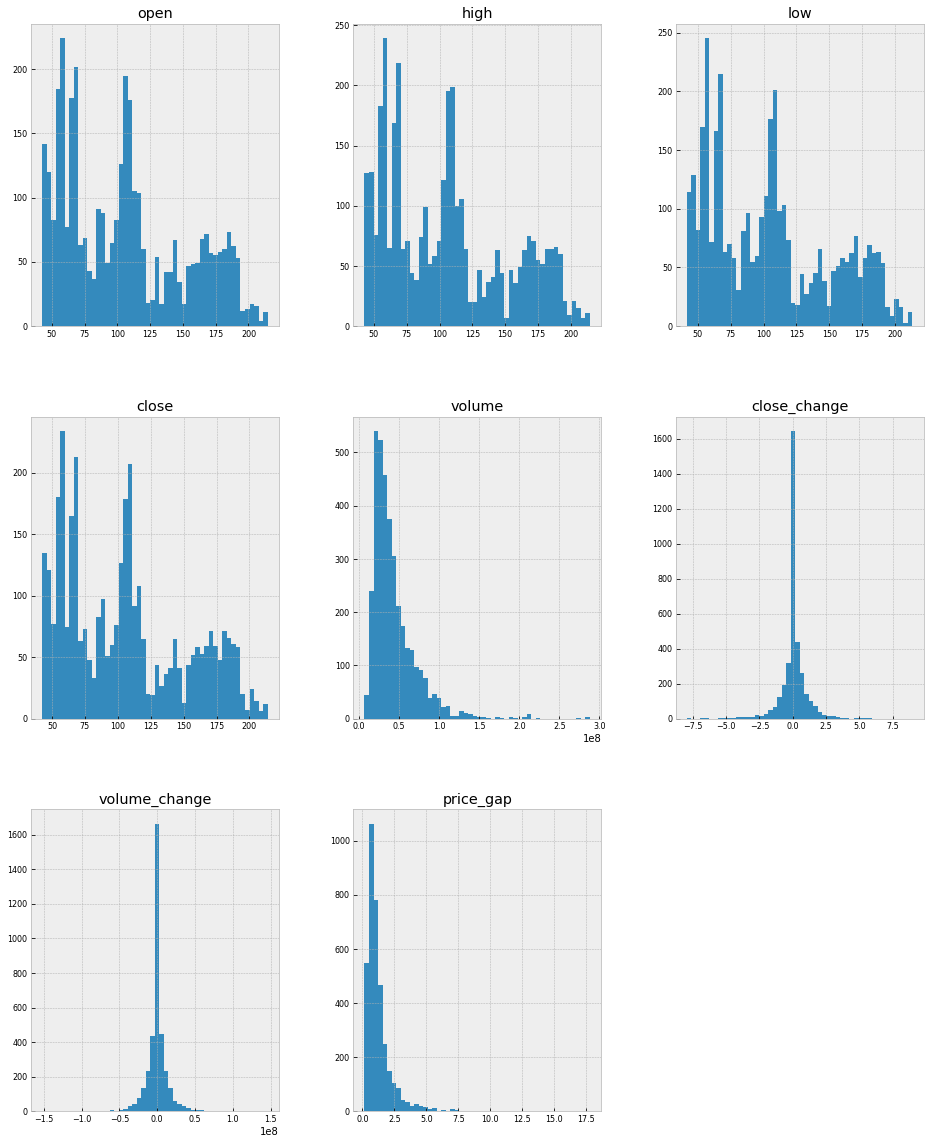

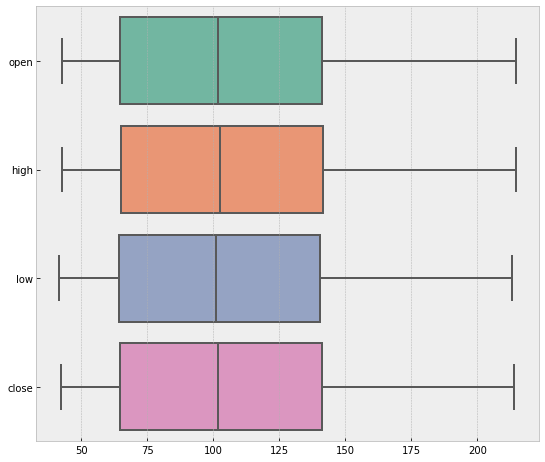

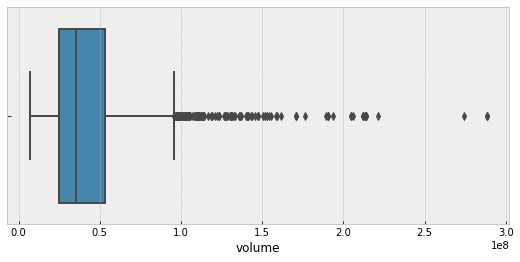

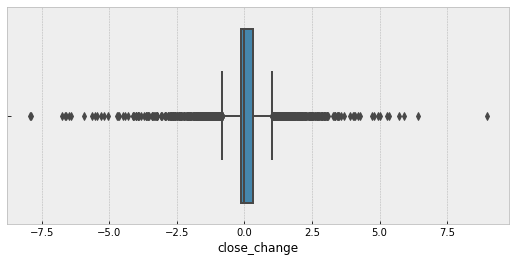

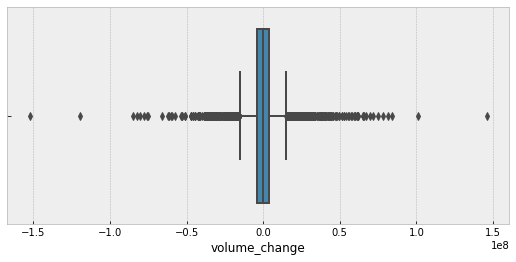

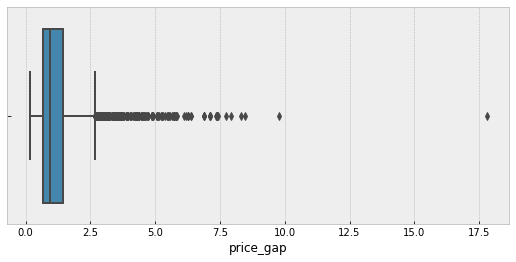

In [91]:
# Groupwide analysis
# Prices
# Histograms
price_qqq.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
# Boxplot
#Prices
plt.figure(figsize=(9, 8))
ax = sns.boxplot(data=price_qqq.iloc[:,:4], orient="h", palette="Set2")
#Others
for variable in ['volume', 'close_change','volume_change', 'price_gap']:
    plt.figure(figsize=(9, 4))
    ax = sns.boxplot(x=price_qqq[variable])

Analysing:  volume
count    3.651000e+03
mean     4.346447e+07
std      2.836434e+07
min      7.079300e+06
25%      2.514200e+07
50%      3.558190e+07
75%      5.332405e+07
max      2.882004e+08
Name: volume, dtype: float64


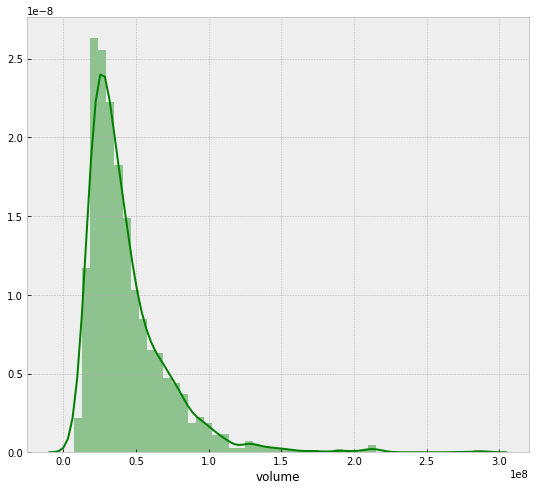

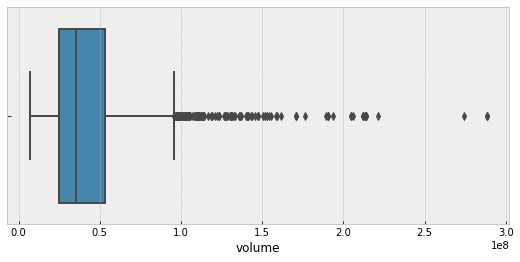

In [85]:
# Analysis on a single variable
print("Analysing: ", price_var[4])
# Describtive statistics
print(price_qqq[price_var[4]].describe())
# Distribution plot
plt.figure(figsize=(9, 8))
sns.distplot(price_qqq[price_var[4]], color='g', bins=50, hist_kws={'alpha': 0.4});
# Box plot
plt.figure(figsize=(9, 4))
ax = sns.boxplot(x=price_qqq[price_var[4]])

EDA for news data

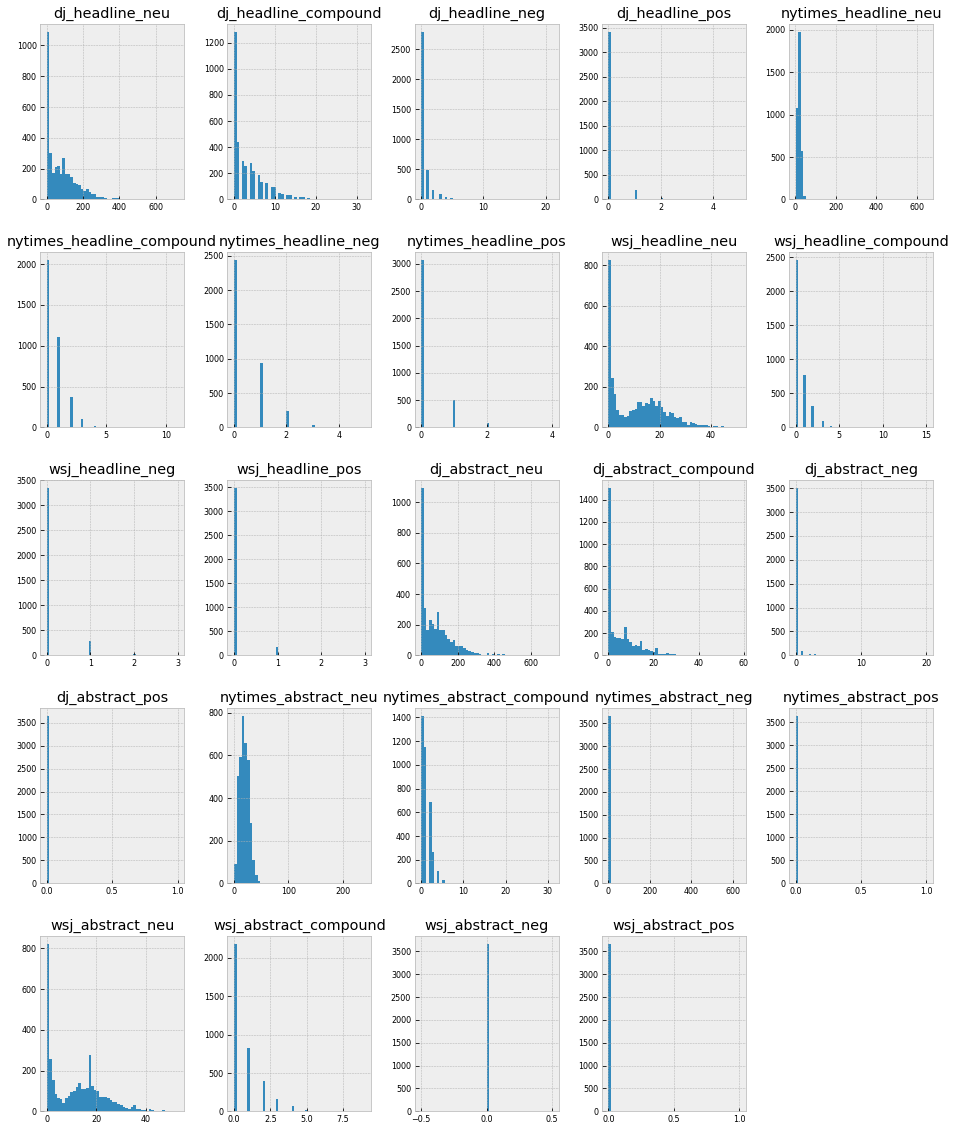

In [90]:
# Groupwide analysis
# Histograms
news_qqq.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

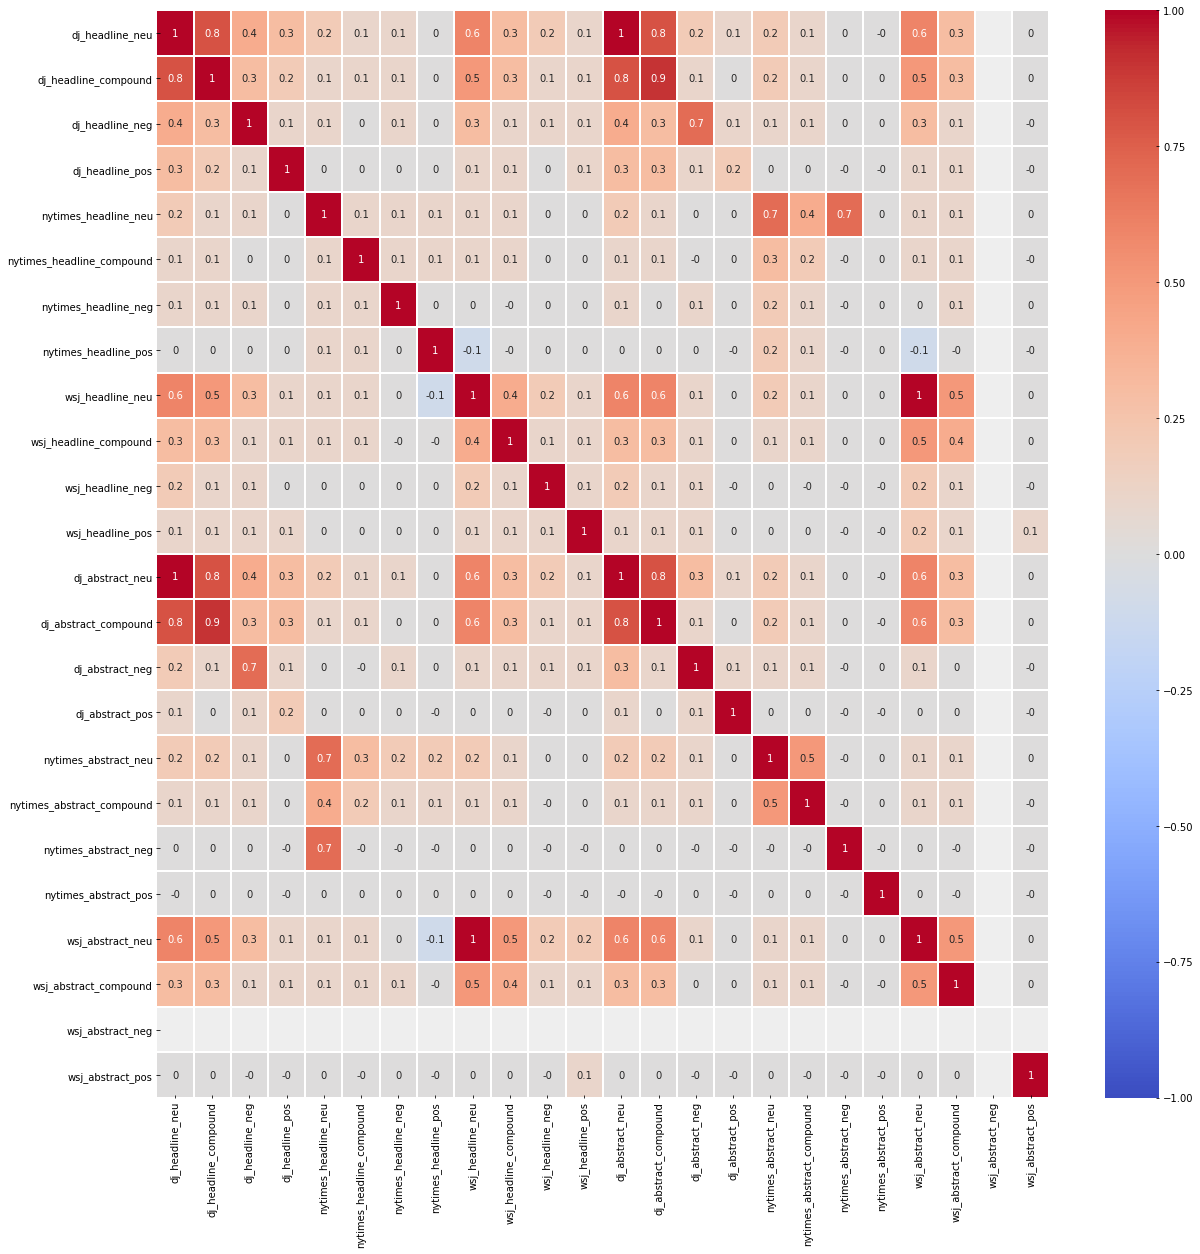

In [131]:
# Heatmap
corr = news_qqq.corr().round(1)
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1,annot_kws={"size": 10});

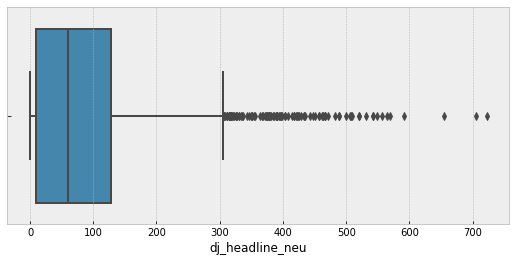

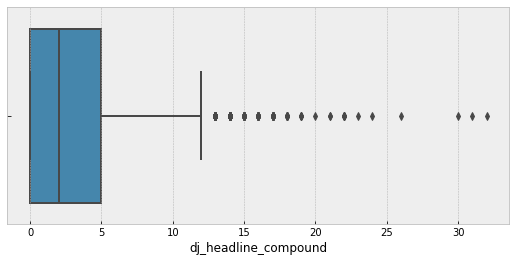

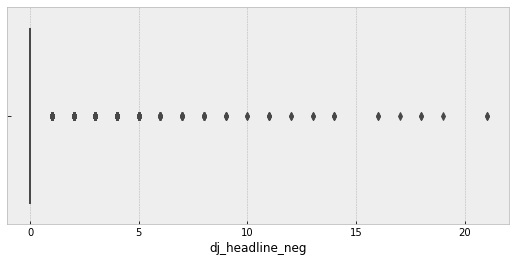

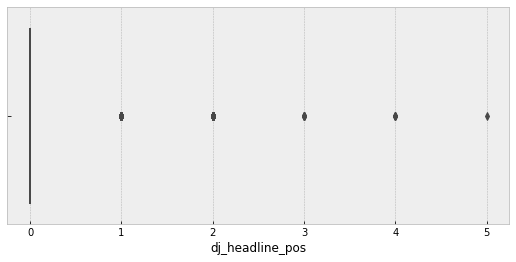

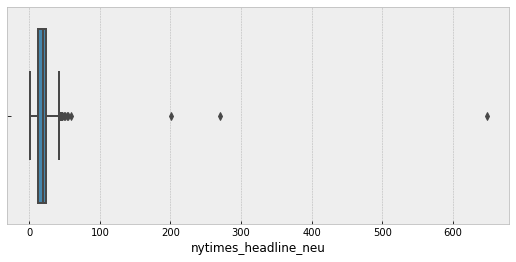

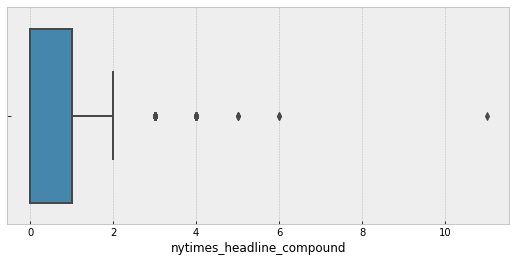

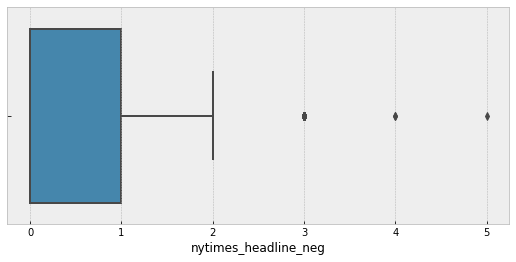

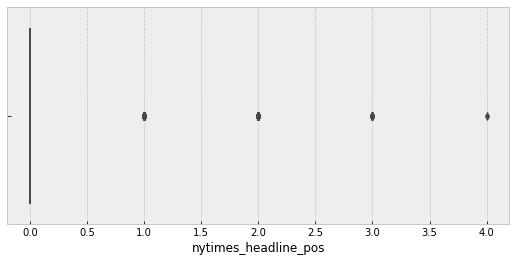

In [115]:
#boxplots
##divide data based on their mean to obtain better visualization
#small = news_qqq.columns[news_qqq.mean(axis = 0) < 10]
#large = news_qqq.columns[news_qqq.mean(axis = 0) >= 10]

for variable in news_qqq.columns[0:8]:
    plt.figure(figsize=(9, 4))
    ax = sns.boxplot(x=news_qqq[variable])

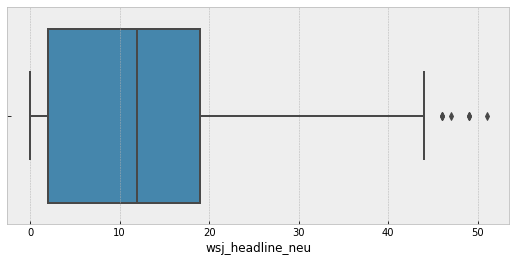

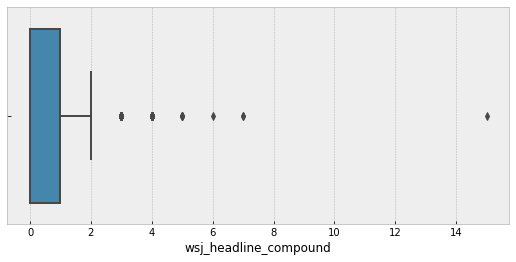

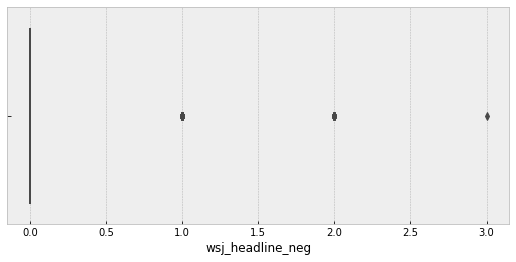

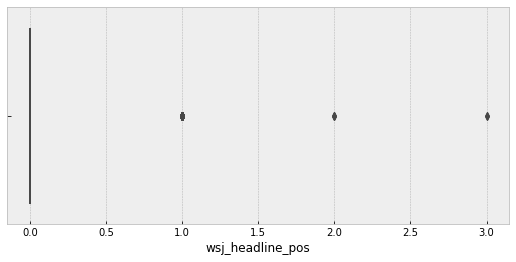

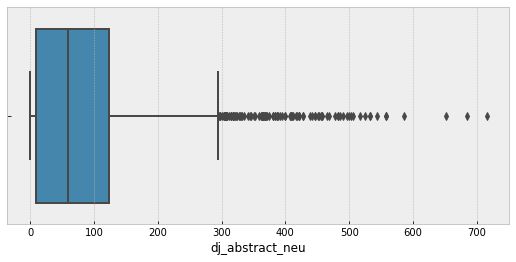

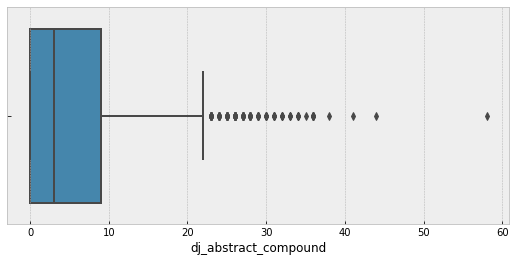

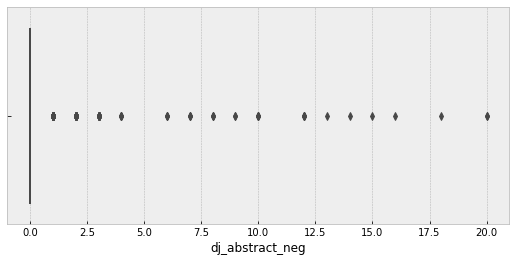

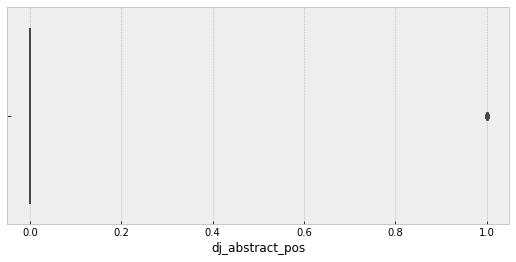

In [116]:
for variable in news_qqq.columns[8:16]:
    plt.figure(figsize=(9, 4))
    ax = sns.boxplot(x=news_qqq[variable])

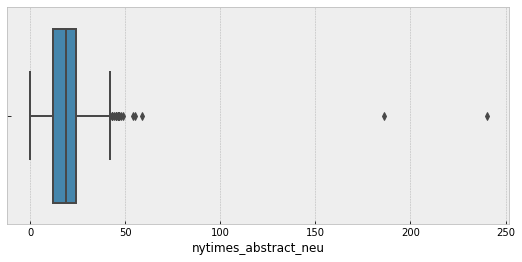

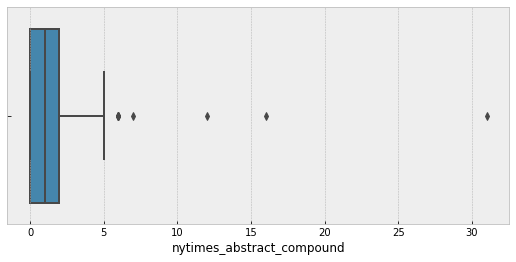

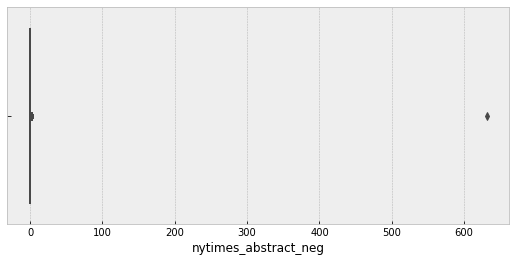

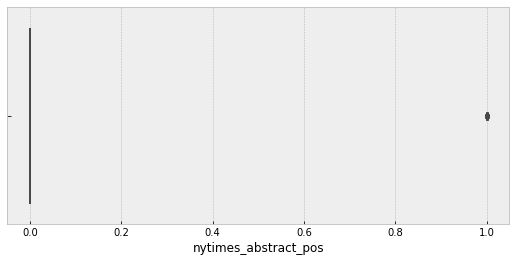

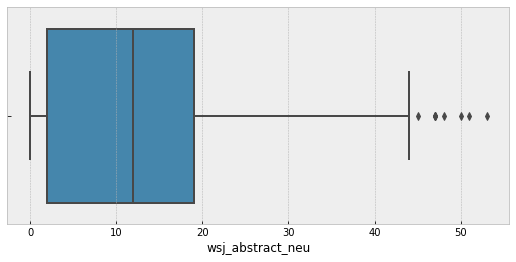

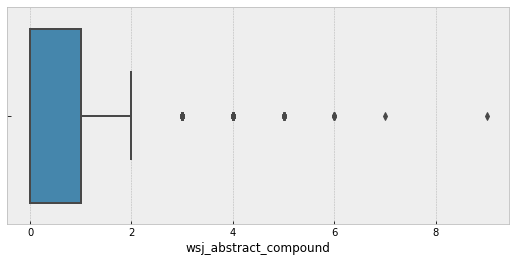

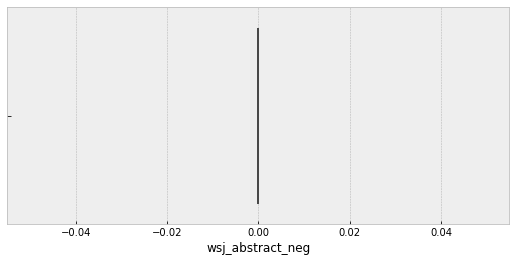

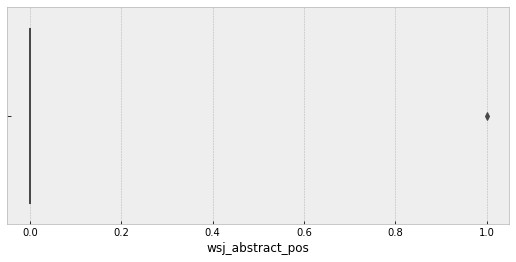

In [117]:
for variable in news_qqq.columns[16:24]:
    plt.figure(figsize=(9, 4))
    ax = sns.boxplot(x=news_qqq[variable])